In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
import pandas as pd
#check the data
df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [3]:
#分析目标值
df['Transported']

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool


占比分布：
Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64


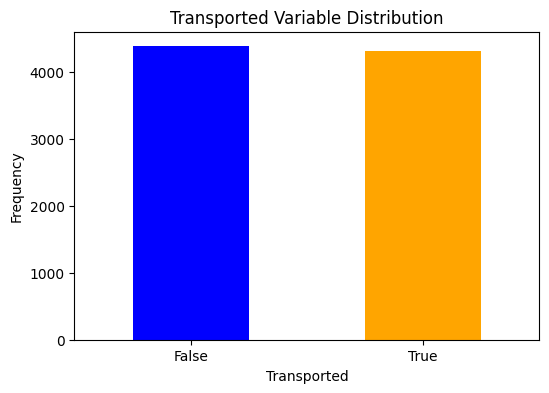

In [4]:
import matplotlib.pyplot as plt

# 计算 True 和 False 的频率
transported_counts = df['Transported'].value_counts()

# 计算占比
transported_proportions = df['Transported'].value_counts(normalize=True)

# 打印占比
print("\n占比分布：")
print(transported_proportions)

# 绘制条形图
plt.figure(figsize=(6, 4))
transported_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Transported Variable Distribution')
plt.xlabel('Transported')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

In [5]:
#合并训练和测试进行数据预处理
import pandas as pd
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
combined = pd.concat([train, test], ignore_index=True)
combined

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [6]:
# 使用独热编码处理 'HomePlanet' 列
Home_encoded = pd.get_dummies(combined['HomePlanet'], prefix='HomePlanet')

# 将新的独热编码列合并到原始 DataFrame
combined = pd.concat([combined, Home_encoded], axis=1)

# 删除原始的 'HomePlanet' 列
combined.drop('HomePlanet', axis=1, inplace=True)

# 显示结果
print(combined.head())


  PassengerId CryoSleep  Cabin  Destination   Age    VIP  RoomService  \
0     0001_01     False  B/0/P  TRAPPIST-1e  39.0  False          0.0   
1     0002_01     False  F/0/S  TRAPPIST-1e  24.0  False        109.0   
2     0003_01     False  A/0/S  TRAPPIST-1e  58.0   True         43.0   
3     0003_02     False  A/0/S  TRAPPIST-1e  33.0  False          0.0   
4     0004_01     False  F/1/S  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck               Name Transported  \
0        0.0           0.0     0.0     0.0    Maham Ofracculy       False   
1        9.0          25.0   549.0    44.0       Juanna Vines        True   
2     3576.0           0.0  6715.0    49.0      Altark Susent       False   
3     1283.0         371.0  3329.0   193.0       Solam Susent       False   
4       70.0         151.0   565.0     2.0  Willy Santantines        True   

   HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  
0             False               True  

In [7]:
#处理CryoSleep

# 将 True 转换为 1，False 转换为 0
combined['CryoSleep'] = combined['CryoSleep'].map({True: 1, False: 0})

# 方法1：用众数（0 或 1）填充 NaN
mode_value = combined['CryoSleep'].mode()[0]
combined['CryoSleep'].fillna(mode_value, inplace=True)


In [8]:
#转换cabin 代表着乘客所在船上的地址
import pandas as pd


# 解析船舱号
cabin_parts = combined['Cabin'].str.split('/', expand=True)
combined['Deck'] = cabin_parts[0]
combined['Room'] = pd.to_numeric(cabin_parts[1], errors='coerce')  # 将房间号转换为数值
combined['Cabin_Type'] = cabin_parts[2]

# 使用众数填充由于解析错误产生的缺失值
combined['Deck'].fillna(combined['Deck'].mode()[0], inplace=True)
combined['Room'].fillna(combined['Room'].median(), inplace=True)
combined['Cabin_Type'].fillna(combined['Cabin_Type'].mode()[0], inplace=True)

# 现在对甲板级别和船舱类型进行独热编码
combined = pd.get_dummies(combined, columns=['Deck', 'Cabin_Type'])




In [9]:
# 处理Destination 乘客即将抵达的星球

# 检查缺失值并填充
combined['Destination'].fillna('TRAPPIST-1e', inplace=True)

# 应用独热编码
combined = pd.get_dummies(combined, columns=['Destination'], drop_first=False)



In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#处理age
# 检查是否有缺失值，并使用中位数填充它们
combined['Age'].fillna(combined['Age'].median(), inplace=True)

# 初始化标准化器
scaler = StandardScaler()

# 对年龄进行标准化处理
combined['Age_standardized'] = scaler.fit_transform(combined[['Age']])


In [11]:
#处理VIP
# 将 null 值视为 false
combined['VIP'] = combined['VIP'].fillna(False)

# 转换布尔值为数值（0 或 1）
combined['VIP'] = combined['VIP'].astype(int)

In [12]:
#处理后面3个数值特征

# 用中位数填充缺失值
combined['RoomService'].fillna(combined['RoomService'].median(), inplace=True)
combined['FoodCourt'].fillna(combined['FoodCourt'].median(), inplace=True)
combined['ShoppingMall'].fillna(combined['ShoppingMall'].median(), inplace=True)
combined['Spa'].fillna(combined['Spa'].median(), inplace=True)
combined['VRDeck'].fillna(combined['VRDeck'].median(), inplace=True)
# 初始化标准化器
scaler = StandardScaler()

# 对特征进行标准化处理
combined['RoomService_standardized'] = scaler.fit_transform(combined[['RoomService']])
combined['FoodCourt_standardized'] = scaler.fit_transform(combined[['FoodCourt']])
combined['ShoppingMall_standardized'] = scaler.fit_transform(combined[['ShoppingMall']])
combined['Spa_standardized'] = scaler.fit_transform(combined[['Spa']])
combined['VRDeck_standardized'] = scaler.fit_transform(combined[['VRDeck']])



In [13]:
combined.drop(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall','Spa','VRDeck'], axis=1, inplace=True)

# 再次检查 DataFrame
print(combined.head())
combined

  PassengerId  CryoSleep  Cabin  VIP               Name Transported  \
0     0001_01        0.0  B/0/P    0    Maham Ofracculy       False   
1     0002_01        0.0  F/0/S    0       Juanna Vines        True   
2     0003_01        0.0  A/0/S    1      Altark Susent       False   
3     0003_02        0.0  A/0/S    0       Solam Susent       False   
4     0004_01        0.0  F/1/S    0  Willy Santantines        True   

   HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  Room  ...  \
0             False               True            False   0.0  ...   
1              True              False            False   0.0  ...   
2             False               True            False   0.0  ...   
3             False               True            False   0.0  ...   
4              True              False            False   1.0  ...   

   Cabin_Type_S  Destination_55 Cancri e  Destination_PSO J318.5-22  \
0         False                    False                      False   
1         

,PassengerId,CryoSleep,Cabin,VIP,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Room,...,Cabin_Type_S,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Age_standardized,RoomService_standardized,FoodCourt_standardized,ShoppingMall_standardized,Spa_standardized,VRDeck_standardized
0,0001_01,0.0,B/0/P,0,Maham Ofracculy,False,False,True,False,0.0,...,False,False,False,True,0.720932,-0.340290,-0.281822,-0.292365,-0.269707,-0.257100
1,0002_01,0.0,F/0/S,0,Juanna Vines,True,True,False,False,0.0,...,True,False,False,True,-0.332557,-0.170439,-0.276082,-0.249566,0.221040,-0.219449
2,0003_01,0.0,A/0/S,1,Altark Susent,False,False,True,False,0.0,...,True,False,False,True,2.055350,-0.273285,1.998823,-0.292365,5.732776,-0.215170
3,0003_02,0.0,A/0/S,0,Solam Susent,False,False,True,False,0.0,...,True,False,False,True,0.299536,-0.340290,0.536429,0.342766,2.706059,-0.091947
4,0004_01,0.0,F/1/S,0,Willy Santantines,True,True,False,False,1.0,...,True,False,False,True,-0.894417,0.131863,-0.237179,-0.033861,0.235342,-0.255389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,1.0,G/1496/S,0,Jeron Peter,NaN,True,False,False,1496.0,...,True,False,False,True,0.369769,-0.340290,-0.281822,-0.292365,-0.269707,-0.257100
12966,9269_01,0.0,NaN,0,Matty Scheron,NaN,True,False,False,431.0,...,True,False,False,True,0.931629,-0.340290,0.258364,-0.263262,-0.260768,-0.133877
12967,9271_01,1.0,D/296/P,0,Jayrin Pore,NaN,False,False,True,296.0,...,False,True,False,False,-0.121859,-0.340290,-0.281822,-0.292365,-0.269707,-0.257100
12968,9273_01,0.0,D/297/P,0,Kitakan Conale,NaN,False,True,False,297.0,...,False,False,False,True,-0.121859,-0.340290,1.427386,-0.292365,-0.269707,0.190440


In [14]:
#重新分割训练集和测试集
# 读取原始训练集和测试集
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

# 获取原始训练集和测试集的行数
N_train = train.shape[0]
N_test = test.shape[0]

# 分离处理后的训练集和测试集
train_processed = combined.iloc[:N_train]
test_processed = combined.iloc[N_train:N_train + N_test]


In [15]:
train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   CryoSleep                  8693 non-null   float64
 2   Cabin                      8494 non-null   object 
 3   VIP                        8693 non-null   int64  
 4   Name                       8493 non-null   object 
 5   Transported                8693 non-null   object 
 6   HomePlanet_Earth           8693 non-null   bool   
 7   HomePlanet_Europa          8693 non-null   bool   
 8   HomePlanet_Mars            8693 non-null   bool   
 9   Room                       8693 non-null   float64
 10  Deck_A                     8693 non-null   bool   
 11  Deck_B                     8693 non-null   bool   
 12  Deck_C                     8693 non-null   bool   
 13  Deck_D                     8693 non-null   bool 

In [16]:
# 分离处理后的训练集和测试集
train_processed = combined.iloc[:N_train]
test_processed = combined.iloc[N_train:]

# 删除非数值型列
train_processed = train_processed.drop(['PassengerId', 'Cabin', 'Name'], axis=1)
test_processed = test_processed.drop(['PassengerId', 'Cabin', 'Name'], axis=1)

# 转换训练集的目标变量为数值型（仅在训练集上执行）
train_processed['Transported'] = train_processed['Transported'].astype(int)

# 现在 train_processed 和 test_processed 都准备好了后续的模型训练和预测


In [17]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 假设目标变量列名为 'Transported'
X = train_processed.drop('Transported', axis=1)
y = train_processed['Transported']

# 分割训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建 LightGBM 数据集
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)

# 定义参数
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'verbose': -1
}

# 训练模型
lgbm_model = lgb.train(params, train_data, valid_sets=[val_data], early_stopping_rounds=100)

# 在验证集上进行预测
y_pred = lgbm_model.predict(X_val, num_iteration=lgbm_model.best_iteration)
y_pred = (y_pred > 0.5).astype(int) # 转换为二元标签

# 计算准确率
accuracy = accuracy_score(y_val, y_pred)
print('Validation Accuracy:', accuracy)


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_error: 0.226567
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_error: 0.218516
[3]	valid_0's binary_error: 0.213341
[4]	valid_0's binary_error: 0.215066
[5]	valid_0's binary_error: 0.215066
[6]	valid_0's binary_error: 0.211041
[7]	valid_0's binary_error: 0.212191
[8]	valid_0's binary_error: 0.211041
[9]	valid_0's binary_error: 0.211041
[10]	valid_0's binary_error: 0.211041
[11]	valid_0's binary_error: 0.207591
[12]	valid_0's binary_error: 0.207591
[13]	valid_0's binary_error: 0.207016
[14]	valid_0's binary_error: 0.20529
[15]	valid_0's binary_error: 0.205865
[16]	valid_0's binary_error: 0.20644
[17]	valid_0's binary_error: 0.20529
[18]	valid_0's binary_error: 0.20299
[19]	valid_0's binary_error: 0.20644
[20]	valid_0's binary_error: 0.203565
[21]	valid_0's binary_error: 0.20414
[22]	valid_0's binary_error: 0.203565
[23]	valid_0's binary_error: 0.20184
[24]	valid_0's binary_error: 0.20184
[25]	valid_0's binary_error: 0.202415
[26]	

In [18]:
# 从测试集中删除 'Transported' 列（如果存在）
test_processed = test_processed.drop(columns=['Transported'], errors='ignore')
# 使用模型进行预测
test_predictions = lgbm_model.predict(test_processed, num_iteration=lgbm_model.best_iteration)
test_predictions = (test_predictions > 0.5)  # 转换为布尔值

# 创建提交 DataFrame
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],  # 从原始测试集获取 PassengerId
    'Transported': test_predictions
})

# 保存提交文件
submission.to_csv('submission.csv', index=False)
